In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from collections import deque
import numpy as np
import multiprocessing
import time
from numpy import array
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
torch.manual_seed(1)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
samplesize = 5

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ppg_data = pd.read_csv('/content/drive/My Drive/QueenslandDataset/MovingWindowdata/ppg.csv')
ecg_data = pd.read_csv('/content/drive/My Drive/QueenslandDataset/MovingWindowdata/ecg.csv')
# offset_data = pd.read_csv('/content/drive/My Drive/QueenslandDataset/MovingWindowdata/offset.csv')

In [ ]:
ppg_data.iloc[[1]]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
1,1,0.40024,0.40464,0.40659,0.40708,0.40562,0.39585,0.3873,0.37705,0.36557,0.34408,0.33626,0.32869,0.3177,0.31502,0.31355,0.31331,0.31404,0.31673,0.31844,0.32063,0.32527,0.32772,0.3304,0.33333,0.33993,0.34359,0.34701,0.35043,0.35385,0.36117,0.36484,0.37411,0.37411,0.38584,0.39219,0.39219,0.39219,0.39219,0.41978,...,0.55092,0.55385,0.55507,0.55629,0.55824,0.55922,0.55995,0.56068,0.5619,0.56264,0.56313,0.56288,0.56166,0.56068,0.55946,0.55849,0.55751,0.55556,0.55482,0.55409,0.55409,0.55507,0.5558,0.55702,0.56117,0.56337,0.56532,0.56679,0.56947,0.5707,0.57167,0.57289,0.57436,0.57778,0.57949,0.5812,0.58291,0.58486,0.58486,0.58486


In [ ]:
ppg_data.iloc[[2]]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
2,2,0.37485,0.37534,0.37558,0.37534,0.37534,0.37558,0.37607,0.3768,0.37875,0.37998,0.37998,0.38242,0.38437,0.38535,0.38535,0.38535,0.38535,0.38559,0.38584,0.38608,0.38584,0.38535,0.38486,0.38413,0.38217,0.38144,0.38095,0.38095,0.38169,0.38266,0.38388,0.38559,0.38999,0.39267,0.39609,0.40024,0.41026,0.41661,0.42271,...,0.3011,0.30037,0.29988,0.29963,0.29963,0.29963,0.29963,0.30012,0.30183,0.30379,0.30647,0.31136,0.31502,0.31893,0.32283,0.32698,0.33358,0.33651,0.34066,0.34603,0.36093,0.36874,0.37582,0.38803,0.3917,0.39365,0.39365,0.39316,0.39072,0.38901,0.38706,0.38559,0.3851,0.38462,0.38364,0.38046,0.379,0.37729,0.37485,0.3707


In [ ]:
!pip install py-ecg-detectors
!pip install git+https://github.com/jtlait/ecg2rr.git#egg=ecg2rr

     |████████████████████████████████| 563kB 3.9MB/s 
  Created wheel for gatspy: filename=gatspy-0.3-cp36-none-any.whl size=43806 sha256=6d1f8676ddb55fc3203eb01a9ccc051f6dd10af2923909c37e48b38bf9adbce6
  Stored in directory: /root/.cache/pip/wheels/4f/8f/fa/0d7b250ef21828ca373b21f6b3b6ef0f2a0e3560b69c91e55d
Successfully built gatspy
  Cloning https://github.com/jtlait/ecg2rr.git to /tmp/pip-install-7yik2c9l/ecg2rr
  Running command git clone -q https://github.com/jtlait/ecg2rr.git /tmp/pip-install-7yik2c9l/ecg2rr
ERROR: Package 'ecg2rr' requires a different Python: 3.6.9 not in '>=3.7'


In [ ]:
from ecgdetectors import Detectors
detectors = Detectors(360)

In [ ]:
ecg_data.iloc[[0]].to_numpy()[0][1:]

array([-0.305 , -0.31  , -0.325 , -0.325 , -0.33  , -0.355 , -0.385 ,
       -0.395 , -0.395 , -0.38  , -0.425 , -0.45  , -0.435 , -0.46  ,
       -0.46  , -0.37  , -0.3   , -0.27  , -0.235 , -0.23  , -0.24  ,
       -0.185 , -0.165 , -0.125 , -0.055 , -0.065 , -0.05  ,  0.025 ,
        0.115 ,  0.235 ,  0.325 ,  0.325 ,  0.29  ,  0.19  , -0.005 ,
       -0.005 , -0.005 , -0.005 , -0.005 , -0.34  , -0.355 , -0.355 ,
       -0.37  , -0.315 ,  0.13  ,  0.7   ,  0.99  ,  0.345 , -0.075 ,
       -0.26  , -0.275 , -0.325 , -0.375 , -0.305 , -0.23  , -0.17  ,
       -0.14  , -0.125 , -0.05  ,  0.06  ,  0.19  ,  0.315 ,  0.48  ,
        0.685 ,  0.835 ,  0.93  ,  1.005 ,  1.    ,  0.935 ,  0.835 ,
        0.71  ,  0.6   ,  0.555 ,  0.475 ,  0.265 ,  0.175 ,  0.155 ,
        0.165 ,  0.08  , -0.1   , -0.15  , -0.255 , -0.345 , -0.35  ,
       -0.315 , -0.325 , -0.335 , -0.28  , -0.315 , -0.34  , -0.385 ,
       -0.415 , -0.345 , -0.365 , -0.375 , -0.265 , -0.22  , -0.27  ,
       -0.175 , -0.1

In [6]:

def prepareData(ecg, ppg):
    if ppg.shape[0] != ecg.shape[0]:
      raise Exception("Data shape doesn't match")
    final_ecg_data = []
    final_ppg_data = []
    count = ecg.shape[0]
    print(count)
    for i in range(count):
        print(f'Processing row {i}')
        if ecg.iloc[[i]].isnull().values.any() or ppg.iloc[[i]].isnull().values.any():
            print("Found Null, Skipping")
            continue

        final_ecg_data.append(ecg.iloc[[i]].to_numpy()[0][1:])
        final_ppg_data.append(ppg.iloc[[i]].to_numpy()[0][1:])
    return final_ecg_data, final_ppg_data
data = prepareData(ecg_data, ppg_data)


Streaming output truncated to the last 5000 lines.
Processing row 186241
Processing row 186242
Processing row 186243
Processing row 186244
Processing row 186245
Processing row 186246
Processing row 186247
Processing row 186248
Processing row 186249
Processing row 186250
Processing row 186251
Processing row 186252
Processing row 186253
Processing row 186254
Processing row 186255
Processing row 186256
Processing row 186257
Processing row 186258
Processing row 186259
Processing row 186260
Processing row 186261
Processing row 186262
Processing row 186263
Processing row 186264
Processing row 186265
Processing row 186266
Processing row 186267
Processing row 186268
Processing row 186269
Processing row 186270
Processing row 186271
Processing row 186272
Processing row 186273
Processing row 186274
Processing row 186275
Processing row 186276
Processing row 186277
Processing row 186278
Processing row 186279
Processing row 186280
Processing row 186281
Processing row 186282
Processing row 186283
Pro

In [ ]:
data

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
r_peaks = detectors.two_average_detector(data[0])

In [ ]:
r_peaks

[68, 359, 541, 724, 908]

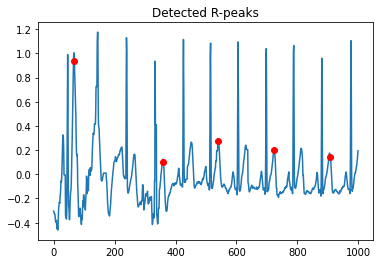

In [ ]:
plt.figure()
plt.plot(data[0])
plt.plot(r_peaks, data[0][r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()


In [ ]:
r_peaks = detectors.swt_detector(data[0])

In [ ]:
r_peaks

[152, 343, 522, 705, 888]

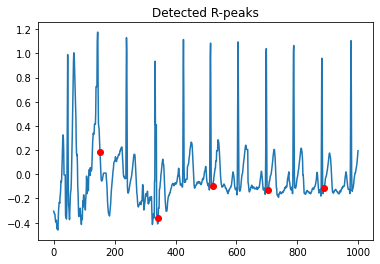

In [ ]:
plt.figure()
plt.plot(data[0])
plt.plot(r_peaks, data[0][r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()


In [ ]:
r_peaks = detectors.engzee_detector(data[0])

In [ ]:
r_peaks

[44, 142, 237, 333, 424, 513, 603, 696, 786, 879, 974]

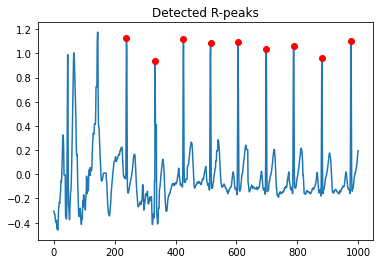

In [ ]:
plt.figure()
plt.plot(data[0])
plt.plot(r_peaks, data[0][r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()


In [ ]:
r_peaks = detectors.christov_detector(data[0])

In [ ]:
r_peaks

[155, 252, 337, 437, 523, 614, 708, 792, 891, 985]

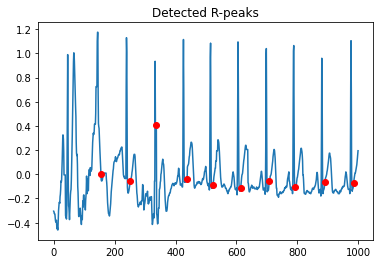

In [ ]:
plt.figure()
plt.plot(data[0])
plt.plot(r_peaks, data[0][r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()


In [ ]:
r_peaks = detectors.hamilton_detector(data[0])

In [ ]:
r_peaks

[111, 249, 365, 525, 707, 817, 986]

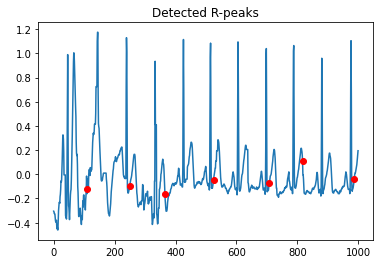

In [ ]:
plt.figure()
plt.plot(data[0])
plt.plot(r_peaks, data[0][r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()


In [ ]:
r_peaks = detectors.pan_tompkins_detector(data[1])

In [ ]:
r_peaks

[149, 273, 426, 535, 699, 821, 988]

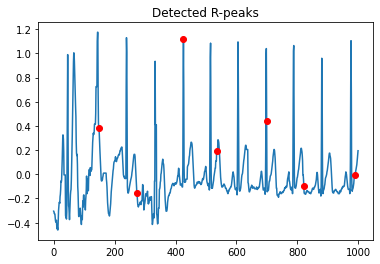

In [ ]:
plt.figure()
plt.plot(data[0])
plt.plot(r_peaks, data[0][r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()


In [7]:
!pip install neurokit2

In [8]:
 import neurokit2 as nk
 import matplotlib.pyplot as plt

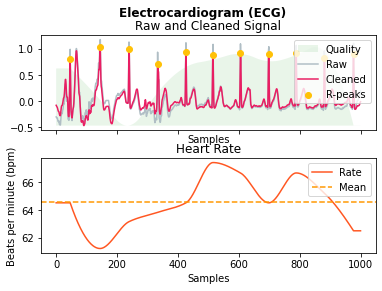

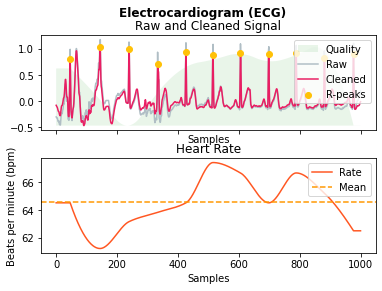

In [ ]:
signals, info = nk.ecg_process(data[0][0], sampling_rate=100)
nk.ecg_plot(signals, show_type='default') 

In [ ]:
signals['ECG_Clean'].to_numpy().shape

(1000,)

In [ ]:
info

{'ECG_R_Peaks': array([ 46, 144, 239, 333, 426, 515, 605, 698, 788, 880, 976])}

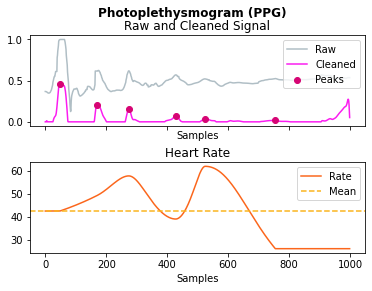

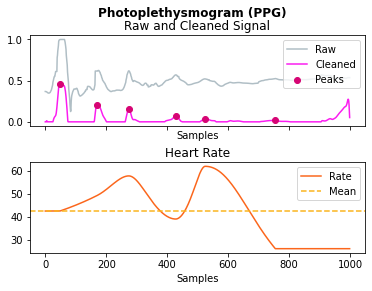

In [15]:
signals, info = nk.ppg_process(data[1][0], sampling_rate=100)
nk.ppg_plot(signals) 

In [16]:
signals

,PPG_Raw,PPG_Clean,PPG_Rate,PPG_Peaks
0,0.36850,0.000000,42.432815,0.0
1,0.36801,0.000000,42.432815,0.0
2,0.36728,0.000000,42.432815,0.0
3,0.36630,0.000000,42.432815,0.0
4,0.36508,0.012045,42.432815,0.0
...,...,...,...,...
995,0.53602,0.271340,26.086957,0.0
996,0.53602,0.250456,26.086957,0.0
997,0.53602,0.207759,26.086957,0.0
998,0.53602,0.141244,26.086957,0.0


In [ ]:
info

{'PPG_Peaks': array([ 48, 170, 274, 428, 525, 755])}

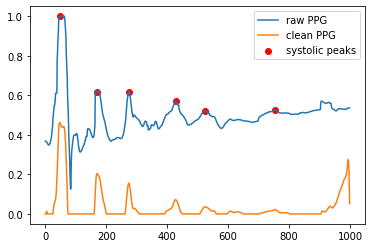

In [ ]:
ppg = data[1][0]
ppg_clean = nk.ppg_clean(ppg, sampling_rate=100)
info = nk.ppg_findpeaks(ppg_clean,sampling_rate=100)
peaks = info["PPG_Peaks"]
plt.plot(ppg, label="raw PPG") 
plt.plot(ppg_clean, label="clean PPG") 
plt.scatter(peaks, ppg[peaks], c="r", label="systolic peaks") 
plt.legend()

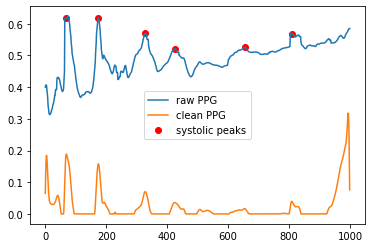

In [ ]:
ppg = data[1][1]
ppg_clean = nk.ppg_clean(ppg, sampling_rate=100)
info = nk.ppg_findpeaks(ppg_clean,sampling_rate=100)
peaks = info["PPG_Peaks"]
plt.plot(ppg, label="raw PPG") 
plt.plot(ppg_clean, label="clean PPG") 
plt.scatter(peaks, ppg[peaks], c="r", label="systolic peaks") 
plt.legend()

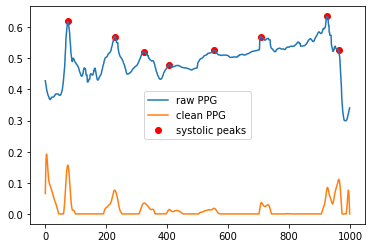

In [ ]:
ppg = data[1][2]
ppg_clean = nk.ppg_clean(ppg, sampling_rate=100)
info = nk.ppg_findpeaks(ppg_clean,sampling_rate=100)
peaks = info["PPG_Peaks"]
plt.plot(ppg, label="raw PPG") 
plt.plot(ppg_clean, label="clean PPG") 
plt.scatter(peaks, ppg[peaks], c="r", label="systolic peaks") 
plt.legend()

In [ ]:
info

{'PPG_Peaks': array([ 69, 174, 328, 425, 654, 809])}

In [50]:
ecg = data[0][8216]
print(len(ecg))
sampling_rate = 100
signals, info = nk.ecg_process(ecg, method="neurokit",sampling_rate=sampling_rate)
# cleaned = nk.ecg_clean(ecg, sampling_rate=sampling_rate)
# cleaned = nk.ecg_clean(ecg, method="neurokit", sampling_rate=sampling_rate)
# print(len(cleaned))
# neurokit = nk.ecg_peaks(cleaned, method="neurokit", sampling_rate=sampling_rate)
# pantompkins1985 = nk.ecg_findpeaks(nk.ecg_clean(ecg, method="pantompkins1985", sampling_rate=sampling_rate), method="pantompkins1985", sampling_rate=sampling_rate)
# hamilton2002 = nk.ecg_findpeaks(nk.ecg_clean(ecg, method="hamilton2002", sampling_rate=sampling_rate), method="hamilton2002", sampling_rate=sampling_rate)
# martinez2003 = nk.ecg_findpeaks(cleaned, method="martinez2003", sampling_rate=sampling_rate)
# christov2004 = nk.ecg_findpeaks(cleaned, method="christov2004", sampling_rate=sampling_rate)
# gamboa2008 = nk.ecg_findpeaks(nk.ecg_clean(ecg, method="gamboa2008", sampling_rate=sampling_rate), method="gamboa2008", sampling_rate=sampling_rate)
# elgendi2010 = nk.ecg_findpeaks(nk.ecg_clean(ecg, method="elgendi2010", sampling_rate=sampling_rate), method="elgendi2010", sampling_rate=sampling_rate)
# engzeemod2012 = nk.ecg_findpeaks(nk.ecg_clean(ecg, method="engzeemod2012"), method="engzeemod2012", sampling_rate=sampling_rate)
# kalidas2017 = nk.ecg_findpeaks(nk.ecg_clean(ecg, method="kalidas2017", sampling_rate=sampling_rate), method="kalidas2017", sampling_rate=sampling_rate)
# rodrigues2020 = nk.ecg_findpeaks(cleaned, method="rodrigues2020", sampling_rate=sampling_rate)


1000


In [51]:
data[0][7217]

array([-0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
      

In [22]:
ecg_cleaned = nk.ecg_clean(data[0][1], method="neurokit", sampling_rate=100)
ecg_peak = nk.ecg_peaks(ecg_cleaned, method="neurokit",sampling_rate=100)

In [27]:
ecg_peak[1]['ECG_R_Peaks']

array([ 44, 139, 233, 326, 415, 505, 598, 688, 780, 876, 976])

In [4]:

def prepareData(ecg, ppg):
    if ppg.shape[0] != ecg.shape[0]:
      raise Exception("Data shape doesn't match")
    final_ecg_data = []
    final_ppg_data = []
    count = ecg.shape[0]
    print(count)
    for i in range(count):
        print(f'Processing row {i}')
        if ecg.iloc[[i]].isnull().values.any() or ppg.iloc[[i]].isnull().values.any():
            print("Found Null, Skipping")
            continue

        final_ecg_data.append(ecg.iloc[[i]].to_numpy()[0][1:])
        final_ppg_data.append(ppg.iloc[[i]].to_numpy()[0][1:])
    return final_ecg_data, final_ppg_data
# data = prepareData(ecg_data, ppg_data)

def prepareFeatures(data):
    ecg = data[0]
    ppg = data[1]
    # print(len(ecg))
    if len(ecg) != len(ppg):
      raise Exception("Data shape doesn't match")
    cleaned_ecg_data = []
    cleaned_ppg_data = []
    r_peaks = []
    s_peaks = []
    sampling_rate = 100
    count = len(ecg)
    
    for i in range(count):
        # print(f'Processing row {i}')
        # if ecg.iloc[[i]].isnull().values.any() or ppg.iloc[[i]].isnull().values.any():
        #     print("Found Null, Skipping")
        #     continue
        ppg_row = ppg[i]
        ecg_row = ecg[i]

        try:
        # if True:
          ecg_cleaned = nk.ecg_clean(ecg_row, method="neurokit", sampling_rate=sampling_rate)
          ecg_peaks = nk.ecg_peaks(ecg_cleaned, method="neurokit",sampling_rate=sampling_rate)[1]['ECG_R_Peaks']
          signals, info = nk.ppg_process(ppg_row, sampling_rate=sampling_rate)
          ppg_cleaned = signals['PPG_Clean'].to_numpy()
          ppg_peaks = signals['PPG_Peaks'].to_numpy()
          cleaned_ecg_data.append(ecg_cleaned)
          cleaned_ppg_data.append(ppg_cleaned)
          r_peaks.append(ecg_peaks)
          s_peaks.append(ppg_peaks)
        except Exception as e:
          print(f"Found invalid data in row {i}: Exception {e}")
          print(f'ECG {ecg_row}')
          print(f'PPG {ppg_row}')
          continue

    return cleaned_ecg_data, cleaned_ppg_data, r_peaks, s_peaks

cleaned_ecg_data, cleaned_ppg_data, r_peaks, s_peaks = prepareFeaturesFinal(ecg_data, ppg_data)

Streaming output truncated to the last 5000 lines.
 0.42198 0.40147 0.38144 0.34408 0.32723 0.31184 0.28987 0.28034 0.27204
 0.2652  0.26056 0.25861 0.26276 0.26813 0.28083 0.2906  0.30037 0.31038
 0.33529 0.34872 0.3619  0.3746  0.38632 0.40586 0.41343 0.41929 0.4232
 0.42662 0.42662 0.4254  0.4232  0.41636 0.41197 0.40708 0.40171 0.38974
 0.38413 0.379   0.37314 0.36093 0.35507 0.34945 0.33871 0.33358 0.32869
 0.3243  0.32088 0.31526 0.31184 0.30842 0.30476 0.29744 0.29328 0.28889
 0.28449 0.27497 0.27106 0.26764 0.25861 0.25397 0.24933 0.24469 0.24029
 0.23175 0.22784 0.22442 0.22247 0.21978 0.21832 0.21734 0.21661 0.21636
 0.21685 0.21758 0.21954 0.221   0.22295 0.2254  0.22808 0.23394 0.23712
 0.24322 0.24322 0.24835 0.2547  0.2547  0.2547  0.2547  0.2547  0.3138
 0.37607 0.41587 0.45983 0.50623 0.55263 0.63736 0.66716 0.68913 0.70818
 0.73138 0.73455 0.7326  0.7265  0.70403 0.68913 0.67253 0.65617 0.62149
 0.60244 0.58266 0.56288 0.52357 0.50427 0.48498 0.44225 0.421   0.4083
 0.

KeyboardInterrupt: ignored

In [4]:
import neurokit2 as nk
import matplotlib.pyplot as plt
def prepareFeaturesFinal(ecg, ppg):
    # print(len(ecg))
    if ppg.shape[0] != ecg.shape[0]:
      raise Exception("Data shape doesn't match")
    cleaned_ecg_data = []
    cleaned_ppg_data = []
    r_peaks = []
    s_peaks = []
    sampling_rate = 100
    count = ecg.shape[0]
    
    for i in range(count):
        # print(f'Processing row {i}')
        if ecg.iloc[[i]].isnull().values.any() or ppg.iloc[[i]].isnull().values.any():
            print("Found Null, Skipping")
            continue
        ppg_row = ppg.iloc[[i]].to_numpy()[0][1:]
        ecg_row = ecg.iloc[[i]].to_numpy()[0][1:]

        try:
        # if True:
          signals, info = nk.ecg_process(ecg_row, method="neurokit", sampling_rate=sampling_rate)
          ecg_cleaned = signals['ECG_Clean'].to_numpy()
          ecg_peaks = signals['ECG_R_Peaks'].to_numpy()
          signals, info = nk.ppg_process(ppg_row, sampling_rate=sampling_rate)
          ppg_cleaned = signals['PPG_Clean'].to_numpy()
          ppg_peaks = signals['PPG_Peaks'].to_numpy()
          cleaned_ecg_data.append(ecg_cleaned)
          cleaned_ppg_data.append(ppg_cleaned)
          r_peaks.append(ecg_peaks)
          s_peaks.append(ppg_peaks)
        except Exception as e:
          print(f"Found invalid data in row {i}: Exception {e}")
          print(f'ECG {ecg_row}')
          print(f'PPG {ppg_row}')
          continue

    return cleaned_ecg_data, cleaned_ppg_data, r_peaks, s_peaks
cleaned_ecg_data, cleaned_ppg_data, r_peaks, s_peaks = prepareFeaturesFinal(ecg_data, ppg_data)

/usr/local/lib/python3.6/dist-packages/neurokit2/stats/standardize.py:81: RuntimeWarning: Mean of empty slice
  z = (data - np.nanmean(data, axis=0)) / np.nanstd(data, axis=0, ddof=1)
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Found invalid data in row 1884: Exception zero-size array to reduction operation fmax which has no identity
ECG [-0.175  -0.17   -0.17   -0.165  -0.16   -0.16   -0.16   -0.16   -0.155
 -0.155  -0.155  -0.15   -0.145  -0.135  -0.135  -0.13   -0.135  -0.135
 -0.125  -0.125  -0.12   -0.115  -0.11   -0.11   -0.105  -0.105  -0.1
 -0.095  -0.095  -0.095  -0.095  -0.095  -0.085  -0.085  -0.08   -0.08
 -0.08   -0.075  -0.075  -0.075  -0.075  -0.07   -0.065  -0.065  -0.065
 -0.065  -0.06   -0.06   -0.055  -0.045  -0.025   0.      0.01    0.025
  0.055   0.06    0.05    0.005  -0.025  -0.065  -0.095  -0.11   -0.115
 -0.105  -0.105  -0.095  -0.085  -0.11   -0.145  -0.06    0.37    1.015
  1.065   0.325   0.02   -0.09   -0.095  -0.105  -0.115  -0.11   -0.105
 -0.105  -0.09   -0.075  -0.06   -0.05   -0.04   -0.025  -0.015   0.005
  0.02    0.04    0.06    0.1     0.13    0.165   0.195   0.225   0.255
  0.275   0.285   0.285   0.265   0.23    0.175   0.1     0.02   -0.045
 -0.115  -0.145  -0.16   -0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Streaming output truncated to the last 5000 lines.
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988
 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988 0.49988


KeyboardInterrupt: ignored

In [ ]:
engzeemod2012

{'ECG_R_Peaks': array([ 44, 139, 233, 326, 415, 505, 597, 687, 780, 876, 976])}

In [ ]:
engzeemod2012

{'ECG_R_Peaks': array([ 23,  40, 133, 226, 315, 405, 498, 587, 680, 776, 876, 970])}

In [ ]:
neurokit

{'ECG_R_Peaks': array([ 44, 139, 233, 326, 415, 505, 598, 688, 780, 876, 976])}

In [ ]:
pantompkins1985

{'ECG_R_Peaks': array([ 33, 149, 244, 326, 424, 515, 607, 697, 790, 876, 980])}

In [ ]:
peaks =                [neurokit["ECG_R_Peaks"],
                       pantompkins1985["ECG_R_Peaks"],
                       hamilton2002["ECG_R_Peaks"],
                       christov2004["ECG_R_Peaks"],
                       gamboa2008["ECG_R_Peaks"],
                       elgendi2010["ECG_R_Peaks"],
                       engzeemod2012["ECG_R_Peaks"],
                       kalidas2017["ECG_R_Peaks"],
                       martinez2003["ECG_R_Peaks"],
                       rodrigues2020["ECG_R_Peaks"]] 

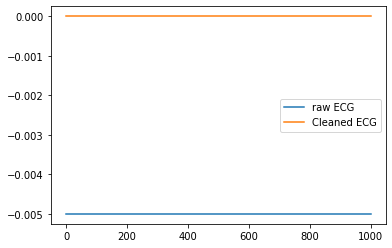

In [45]:
  plt.figure()
  plt.plot(ecg, label="raw ECG") 
  # plt.legend()
  # plt.figure()
  plt.plot(cleaned, label="Cleaned ECG") 
  plt.legend()

In [47]:
ecg = data[0][7218]

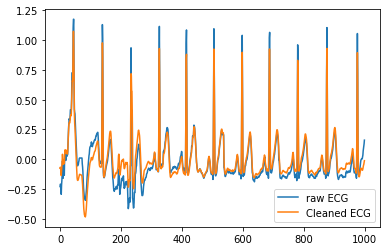

In [ ]:
  plt.figure()
  plt.plot(ecg, label="raw ECG") 
  # plt.legend()
  # plt.figure()
  plt.plot(cleaned, label="Cleaned ECG") 
  plt.legend()

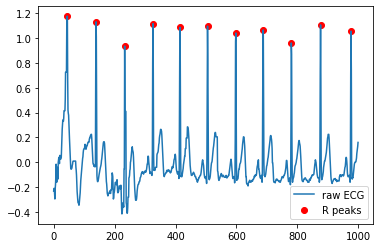

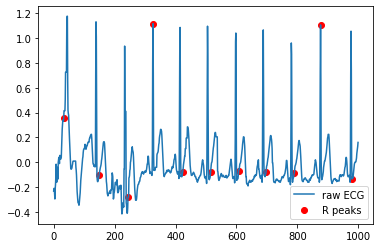

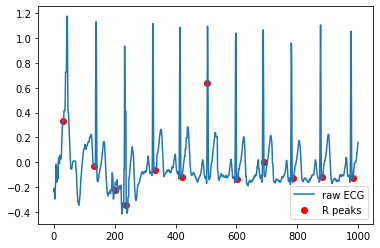

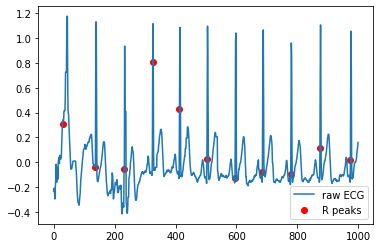

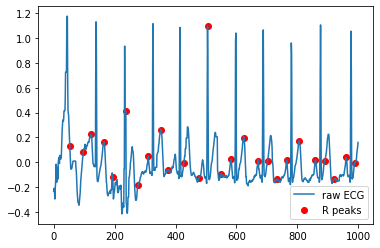

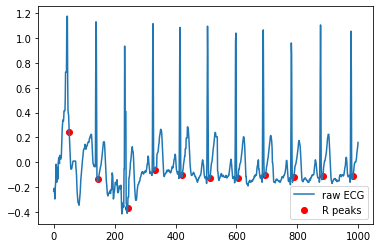

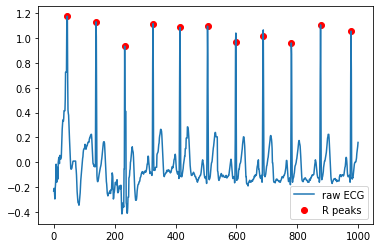

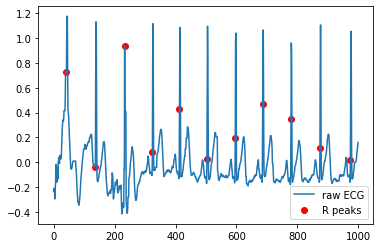

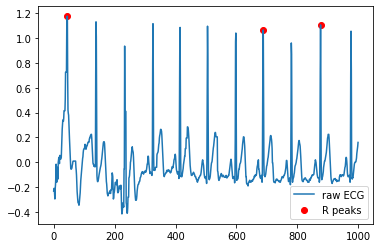

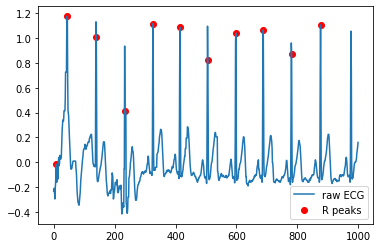

In [ ]:
for peak in peaks:
  plt.figure()
  plt.plot(ecg, label="raw ECG") 
  plt.scatter(peak, ecg[peak], c="r", label="R peaks") 
  plt.legend()

In [10]:
def avg_PTT(r_points,sys_points):
  total=0
  count=0
  values=[]
  print('systolic Peak',sys_points)
  print('r peak ',r_points)
  limit=min(len(sys_points),len(r_points))
  for i in range(0,limit):
    for j in range(i,len(sys_points)):
      if (sys_points[j]-r_points[i]>0):
        count+=1
        #total=total+sys_points[j]-r_points[i]
        values.append(sys_points[j]-r_points[i])
        print(sys_points[j],'-',r_points[i],'=',sys_points[j]-r_points[i])
        break
  print(values)
  mean = np.mean(values, axis=0)
  sd = np.std(values, axis=0)
  print(mean,sd)
  if(sd!=0):
    final_list = [x for x in values if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
  else:
    final_list=values

  print('updated',final_list)
  print (np.mean(final_list,axis=0))
  return np.mean(final_list,axis=0)
  #return total/count

In [11]:
avg_PTT(r_peaks[0], s_peaks[0])

systolic Peak [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [7]:
r_peaks

[array([ 46, 144, 239, 333, 426, 515, 605, 698, 788, 880, 976]),
 array([ 44, 139, 233, 326, 415, 505, 598, 688, 780, 876, 976]),
 array([ 39, 133, 226, 315, 405, 498, 588, 680, 776, 876, 970]),
 array([ 33, 126, 215, 305, 398, 488, 580, 676, 776, 870, 967]),
 array([115, 205, 298, 388, 480, 576, 676, 770, 867, 965]),
 array([105, 198, 288, 380, 476, 576, 670, 767, 865, 965]),
 array([ 98, 188, 280, 376, 476, 570, 667, 765, 865, 966]),
 array([ 88, 180, 276, 376, 470, 567, 665, 765, 866, 973]),
 array([ 80, 176, 276, 370, 467, 565, 665, 766, 873, 979]),
 array([ 76, 176, 270, 367, 465, 565, 666, 773, 879, 987]),
 array([ 76, 170, 267, 365, 465, 566, 673, 779, 887]),
 array([ 70, 167, 265, 365, 466, 573, 679, 787, 897, 988]),
 array([ 67, 165, 265, 366, 473, 579, 687, 797, 904]),
 array([ 65, 165, 266, 373, 479, 587, 697, 804, 914]),
 array([ 65, 166, 273, 379, 487, 597, 704, 814, 924]),
 array([ 66, 173, 279, 387, 497, 604, 714, 824, 938]),
 array([ 73, 179, 287, 397, 504, 614, 724, 83

In [8]:
cleaned_ecg_data

Output hidden; open in https://colab.research.google.com to view.